In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
%matplotlib inline

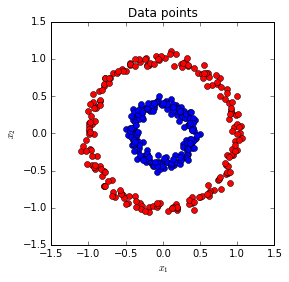

In [23]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.4, noise=.05)
reds = y == 0
blues = y == 1

plt.figure()
plt.subplot(1,1,1, aspect='equal')
plt.title('Data points')
plt.plot(X[reds,0], X[reds,1], 'ro')
plt.plot(X[blues,0], X[blues,1], 'bo')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

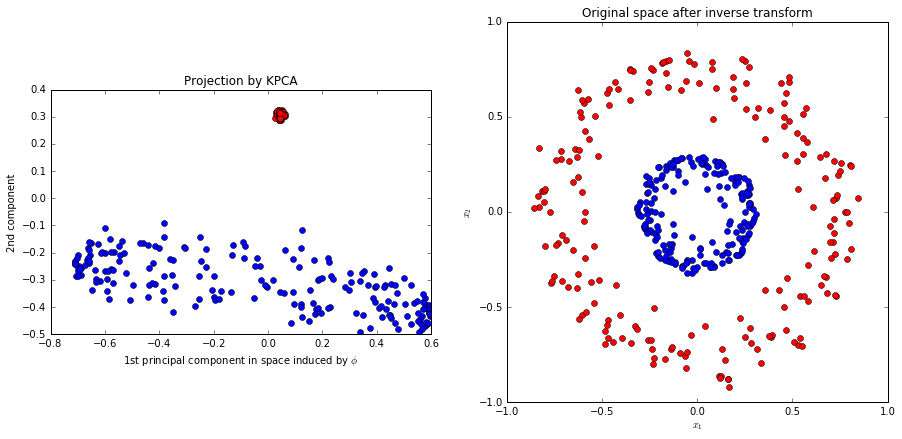

In [18]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

# X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
# X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# # projection on the first principal component (in the phi space)
# Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
# plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure(figsize=(15,20))
plt.subplot(1,2,1, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.subplot(1,2,2, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

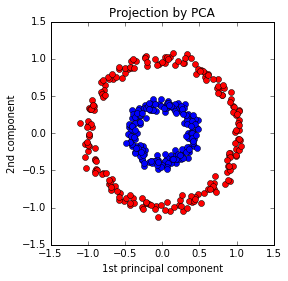

In [25]:
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure()
plt.subplot(1,1,1,aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

# More KPCA

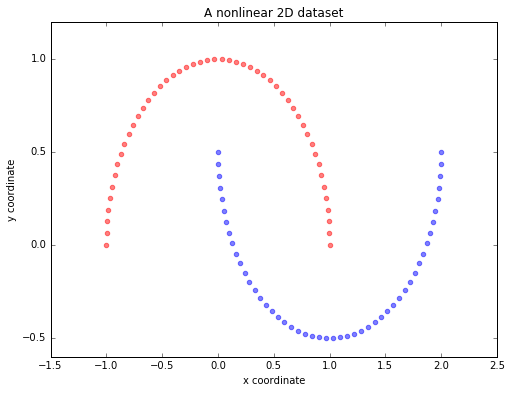

In [38]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2D dataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

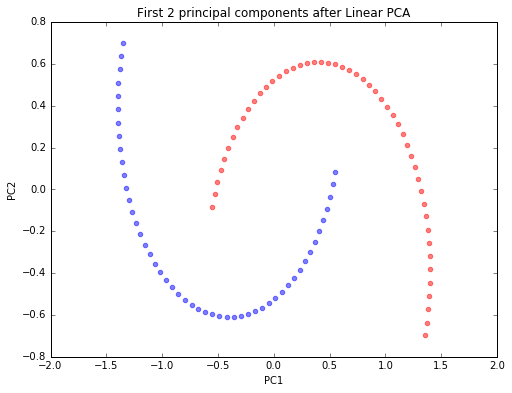

In [39]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

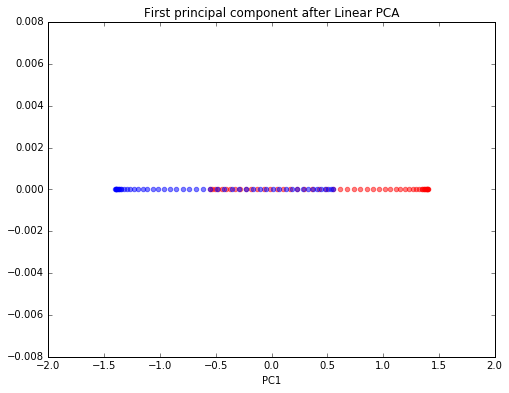

In [30]:
import numpy as np
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

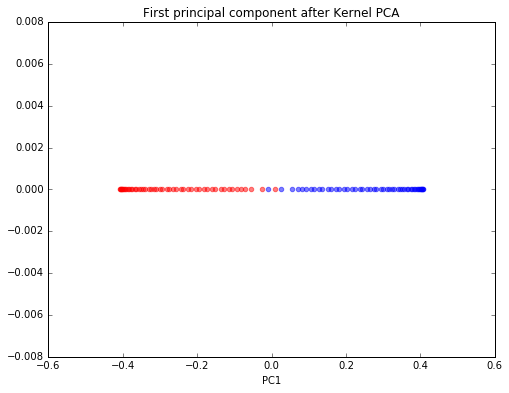

In [49]:
kpca = KernelPCA(kernel='rbf', n_components=1, gamma=10, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8,6))
# plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)

plt.scatter(X_kpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Kernel PCA')
plt.xlabel('PC1')

plt.show()

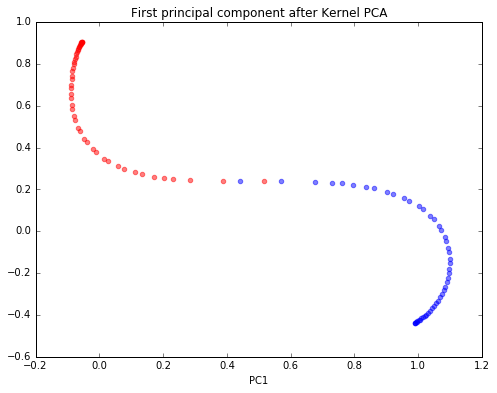

In [50]:
X_kpca_back = kpca.inverse_transform(X_kpca)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca_back[y==0, 0], X_kpca_back[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca_back[y==1, 0], X_kpca_back[y==1, 1], color='blue', alpha=0.5)

# plt.scatter(X_kpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
# plt.scatter(X_kpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Kernel PCA')
plt.xlabel('PC1')

plt.show()